In [1]:
#importing the necessary librarires
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Check point 1: Data Cleaning 1

In [2]:
#Reading the CSV files
companies= pd.read_csv('companies.csv',encoding= 'latin1')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
rounds2 = pd.read_csv("rounds2.csv",encoding='latin1')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [5]:
# fixing the special characters
rounds2['company_permalink']=rounds2.company_permalink.str.encode('utf-8').str.decode('ascii','ignore')
companies['permalink']=companies.permalink.str.encode('utf-8').str.decode('ascii','ignore')
companies.name=companies.name.str.encode('utf-8').str.decode('ascii','ignore')

In [6]:
#converting the company_permalink to lowercase
rounds2["company_permalink"]=rounds2["company_permalink"].str.lower()

In [7]:
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [8]:
rounds2.company_permalink.describe()

count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [9]:
#converting permalink column values to lowercase
companies.permalink=companies.permalink.str.lower()

In [10]:
#checking for unique values
companies.permalink.describe()

count                    66368
unique                   66368
top       /organization/treato
freq                         1
Name: permalink, dtype: object

In [11]:
rounds2['company_permalink'].isin(companies['permalink']).count()

114949

In [12]:
#merging the two dataframes to create a main master frame
master_frame=pd.merge(rounds2,companies,how='inner',left_on='company_permalink',right_on='permalink')

In [13]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN,/organization/eron,ERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0,/organization/asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [14]:
#checking for null values in master frame
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [15]:
#checking the percentage of null values
round(100*(master_frame.isnull().sum()/len(master_frame)),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [16]:
# dropping columns that dont hold value for the analysis
master_frame=master_frame.drop('founded_at',axis=1)
master_frame=master_frame.drop('funding_round_code',axis=1)


In [17]:
#removing null values from column raised_amount_usd
master_frame=master_frame[~master_frame.raised_amount_usd.isnull()]

In [18]:
#removing null values from category_list
master_frame=master_frame[~master_frame.category_list.isnull()]

In [19]:
round(100*(master_frame.isnull().sum()/len(master_frame)),2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               4.27
category_list              0.00
status                     0.00
country_code               5.73
state_code                 7.58
region                     7.00
city                       6.99
dtype: float64

## Check Point 2 : Funding Type Analysis

In [20]:
#creating a new dataframe where the values are only from the corresponding column funding_round_type 
master_frame=master_frame.loc[master_frame.funding_round_type.isin(['venture','angel','seed','private_equity'])]

In [21]:
master_frame.raised_amount_usd.describe()

count    7.977200e+04
mean     9.324375e+06
std      7.595143e+07
min      0.000000e+00
25%      4.000000e+05
50%      2.000000e+06
75%      7.872561e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [22]:
#displaying full numbers
pd.set_option('display.float_format', '{:.2f}'.format)

In [23]:
#checking which funding type has raised the most amount of investment
master_frame.groupby('funding_round_type')['raised_amount_usd'].sum().sort_values(ascending=False)

funding_round_type
venture          582643250557.00
private_equity   139798456004.00
seed              16783758187.00
angel              4598613672.00
Name: raised_amount_usd, dtype: float64

Text(0.5, 1.0, '')

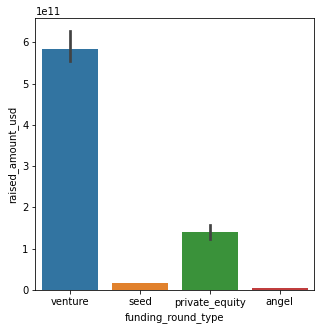

In [25]:
#plotting the data showing which funding type has received highest investment
plt.figure(figsize=(5,5))
sns.barplot(data=master_frame, x='funding_round_type',y='raised_amount_usd',estimator=np.sum)
plt.title('')


Text(0.5, 1.0, 'average')

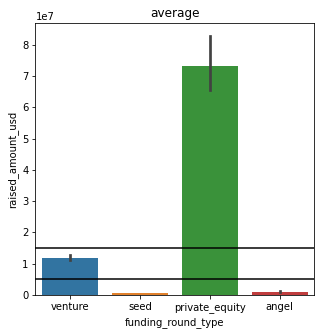

In [27]:
#plot displays the most suitable funding type according to Spark Fund investment where they want invest within 5-15 Mn USD
plt.figure(figsize=(5,5))
sns.barplot(data=master_frame, x='funding_round_type',y='raised_amount_usd')
plt.axhline(y=15000000,color='black')
plt.axhline(y=5000000,color='black')
plt.title('average')


## Checkpoint: 3 Country Analysis

In [28]:
#creating a dataframe to include top 9 countries of venture type funding
top9=master_frame.loc[master_frame['funding_round_type']=='venture']

In [29]:
#sorting the top9 dataframe according to the raised amount
top9.groupby(['country_code']).sum().sort_values(by=['raised_amount_usd'],ascending=False).head(9)

,raised_amount_usd
country_code,
USA,420068029342.00
CHN,39338918773.00
GBR,20072813004.00
IND,14261508718.00
CAN,9482217668.00
FRA,7226851352.00
ISR,6854350477.00
DEU,6306921981.00
JPN,3167647127.00


In [30]:
top9_plot=top9.groupby(['country_code']).sum().sort_values(by=['raised_amount_usd'],ascending=False).head(9)

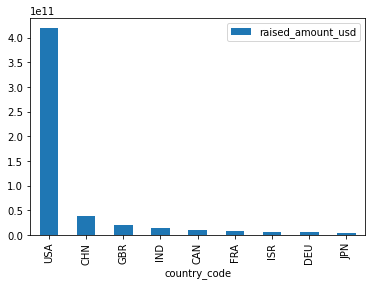

In [31]:
#plot shows USA has received the highest investment
top9_plot.plot.bar()
plt.show()

## Checkpoint 4: Sector Analysis

In [32]:
#making sure the top9 dataframe includes only the top 9 countries
top9=top9[top9['country_code'].isin(['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'])]

In [33]:
#splitting the first sector from category_list adding it to a new column 
top9['primary_sector']=top9.category_list.str.split('|').str[0].str.lower().copy()

In [34]:
top9=top9.drop('category_list',axis=1)

In [35]:
#loading the mapping data
mapping=pd.read_csv('mapping.csv')

In [36]:
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [37]:
#checking for null vlaues
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [38]:
#cleaning the data
mapping=mapping[~mapping.category_list.isnull()]

In [39]:
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [40]:
#converting the category_list in mapping column to lower case
mapping.category_list=mapping.category_list.apply(lambda x: str(x).lower())

In [41]:
mapping.category_list

1                    3d
2           3d printing
3         3d technology
4            accounting
5      active lifestyle
             ...       
683           wholesale
684    wine and spirits
685            wireless
686               women
687        young adults
Name: category_list, Length: 687, dtype: object

In [42]:
#checking if there is any data which is present in primary sector
mapping[~mapping.category_list.isin(top9.primary_sector)].head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
33,aquaculture,0,0,1,0,0,0,0,0,0
59,big data a0lytics,0,0,0,0,0,0,0,0,1


In [43]:
top9[~top9['primary_sector'].isin(mapping['category_list'])]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,status,country_code,state_code,region,city,primary_sector
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,operating,USA,CA,SF Bay Area,Mountain View,analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,operating,USA,CA,SF Bay Area,Mountain View,analytics
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,operating,USA,CA,SF Bay Area,Mountain View,analytics
61,/organization/100plus,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,500000.00,/organization/100plus,100Plus,http://www.100plus.com,acquired,USA,CA,SF Bay Area,San Francisco,analytics
148,/organization/19pay,/funding-round/61660637eae067a2980ecbc3633ad262,venture,01-01-2010,6230000.00,/organization/19pay,19pay,http://www.19pay.com.cn,operating,CHN,22,Beijing,Beijing,finance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114660,/organization/zopa,/funding-round/2a55d435c3433d8f903526c050c19361,venture,20-03-2007,12900000.00,/organization/zopa,Zopa,http://www.zopa.com,operating,GBR,H9,London,London,finance
114661,/organization/zopa,/funding-round/4b0740cb83da8d2af9d221e5455f8923,venture,01-03-2006,15000000.00,/organization/zopa,Zopa,http://www.zopa.com,operating,GBR,H9,London,London,finance
114663,/organization/zopa,/funding-round/54dbfbd899caf7d1d4b2b7676065f303,venture,01-07-2006,5000000.00,/organization/zopa,Zopa,http://www.zopa.com,operating,GBR,H9,London,London,finance
114664,/organization/zopa,/funding-round/720b9f244c1f4d4fed63361d3bb0aa22,venture,01-01-2005,1000000.00,/organization/zopa,Zopa,http://www.zopa.com,operating,GBR,H9,London,London,finance


In [44]:
#replacing 0 from category_list name
mapping.category_list=mapping.category_list.apply(lambda x: x.replace('0','na'))

In [45]:
mapping.tail()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
683,wholesale,0,0,0,0,0,0,0,1,0
684,wine and spirits,0,0,0,1,0,0,0,0,0
685,wireless,0,0,0,1,0,0,0,0,0
686,women,0,0,0,0,0,0,0,1,0
687,young adults,0,0,0,0,0,0,0,1,0


In [46]:
#converting from  a wide format to long format
mapping=pd.melt(mapping,id_vars='category_list')

In [47]:
mapping.head()

,category_list,variable,value
0,3d,Automotive & Sports,0
1,3d printing,Automotive & Sports,0
2,3d technology,Automotive & Sports,0
3,accounting,Automotive & Sports,0
4,active lifestyle,Automotive & Sports,0


In [48]:
mapping=mapping[mapping.value==1]

In [49]:
#dropping 0 values
mapping.drop('value',axis=1,inplace=True)

In [50]:
#renaming the variable column as main_sector
mapping.rename(columns={'variable':'main_sector'},inplace=True)

In [51]:
mapping.isnull().sum()

category_list    0
main_sector      0
dtype: int64

In [52]:
#merging the mapping and top9 dataframe
top9_mapping=pd.merge(top9,mapping,how='left',left_on='primary_sector',right_on='category_list')

In [53]:
top9_mapping

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,status,country_code,state_code,region,city,primary_sector,category_list,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,operating,IND,16,Mumbai,Mumbai,media,media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,operating,CHN,22,Beijing,Beijing,curated web,curated web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.00,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,operating,CAN,BC,Vancouver,Vancouver,biotechnology,biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,operating,USA,CA,SF Bay Area,Mountain View,analytics,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,operating,USA,CA,SF Bay Area,Mountain View,analytics,analytics,"Social, Finance, Analytics, Advertising"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44113,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.00,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,operating,USA,MO,MO - Other,Fremont,biotechnology,biotechnology,Cleantech / Semiconductors
44114,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.00,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,operating,USA,MO,MO - Other,Fremont,biotechnology,biotechnology,Cleantech / Semiconductors
44115,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.00,/organization/zyrra,Zyrra,http://www.zyrra.com,operating,USA,MA,Boston,Cambridge,e-commerce,e-commerce,Others
44116,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.00,/organization/zystor,Zystor,http://www.zystor.com,acquired,USA,WI,Milwaukee,Milwaukee,biotechnology,biotechnology,Cleantech / Semiconductors


In [54]:
top9_mapping.drop('category_list',axis=1,inplace=True)

In [55]:
#checking for null values
top9_mapping.isnull().sum()

company_permalink             0
funding_round_permalink       0
funding_round_type            0
funded_at                     0
raised_amount_usd             0
permalink                     0
name                          0
homepage_url               2000
status                        0
country_code                  0
state_code                  285
region                      446
city                        446
primary_sector                0
main_sector                  16
dtype: int64

## Checkpoint 5: Sector Analysis 2

In [56]:
#arranging the datframe such that it lies within the funds required investment amount
top9_range=top9_mapping[(top9_mapping.raised_amount_usd<= 15000000)&(top9_mapping.raised_amount_usd>=5000000)]

In [57]:
top9_range

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,status,country_code,state_code,region,city,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,operating,IND,16,Mumbai,Mumbai,media,Entertainment
5,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising"
6,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.00,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,acquired,USA,CA,SF Bay Area,Cupertino,apps,"News, Search and Messaging"
13,/organization/1001-menus,/funding-round/645b4cd895450b8e0268027cd7813047,venture,04-11-2015,6602694.00,/organization/1001-menus,ZenChef,http://zenchef.com/en/,operating,FRA,A8,Paris,Paris,local businesses,Others
16,/organization/1001pharmacies-com,/funding-round/a21fc4d20200f43e3a25fd9cfc7c1482,venture,09-07-2015,8900000.00,/organization/1001pharmacies-com,1001pharmacies.com,http://www.1001pharmacies.com/,operating,FRA,A9,Montpellier,Montpellier,cosmetics,Health
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44108,/organization/zynga,/funding-round/eb198261da812bc8d3bf475ccec44000,venture,12-02-2008,5026000.00,/organization/zynga,Zynga,http://www.zynga.com,ipo,USA,CA,SF Bay Area,San Francisco,facebook applications,"Social, Finance, Analytics, Advertising"
44110,/organization/zynstra,/funding-round/05f43b37c270f5919578281ce803de8f,venture,09-07-2014,8400000.00,/organization/zynstra,Zynstra,http://www.zynstra.com,operating,GBR,A4,Bath,Bath,software,Others
44112,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,30-06-2013,12000000.00,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,operating,USA,MO,MO - Other,Fremont,biotechnology,Cleantech / Semiconductors
44113,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.00,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,operating,USA,MO,MO - Other,Fremont,biotechnology,Cleantech / Semiconductors


In [58]:
#checking and cleaning the dataframe 
top9_range.isnull().sum()

company_permalink            0
funding_round_permalink      0
funding_round_type           0
funded_at                    0
raised_amount_usd            0
permalink                    0
name                         0
homepage_url               673
status                       0
country_code                 0
state_code                  92
region                     136
city                       136
primary_sector               0
main_sector                  1
dtype: int64

In [59]:
top9_range=top9_range[~top9_range.country_code.isnull()]

In [60]:
top9_range=top9_range[~top9_range.region.isnull()]

In [61]:
top9_range=top9_range[~top9_range.city.isnull()]

In [62]:
top9_range=top9_range[~top9_range.state_code.isnull()]

In [63]:
top9_range=top9_range[~top9_range.homepage_url.isnull()]

In [64]:
top9_range.isnull().sum()

company_permalink          0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
permalink                  0
name                       0
homepage_url               0
status                     0
country_code               0
state_code                 0
region                     0
city                       0
primary_sector             0
main_sector                1
dtype: int64

In [65]:
#removing all the null values
top9_range=top9_range[~top9_range.main_sector.isnull()]

In [66]:
#creating three dataframe sfor top 3 english speaking countries
D1=top9_range[top9_range.country_code== 'USA']
D2=top9_range[top9_range.country_code== 'GBR']
D3=top9_range[top9_range.country_code== 'IND']

In [67]:
#counting the no. of investments for USA
D1.raised_amount_usd.count()

11487

In [68]:
#total amount of investment in USA
D1.raised_amount_usd.sum()

102541992937.0

In [69]:
#checking which sector has recieved the highest investment
D1.pivot_table(values='raised_amount_usd',index='main_sector',aggfunc=['sum','count'])

,sum,count
,raised_amount_usd,raised_amount_usd
main_sector,,
Automotive & Sports,1358012139.00,156
Cleantech / Semiconductors,20462795400.00,2220
Entertainment,4953440304.00,575
Health,7745752684.00,855
Manufacturing,6827639054.00,754
"News, Search and Messaging",13523888953.00,1535
Others,24412004183.00,2744
"Social, Finance, Analytics, Advertising",23258460220.00,2648


In [70]:
D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     2744
Social, Finance, Analytics, Advertising    2648
Cleantech / Semiconductors                 2220
News, Search and Messaging                 1535
Health                                      855
Manufacturing                               754
Entertainment                               575
Automotive & Sports                         156
Name: raised_amount_usd, dtype: int64

In [71]:
#finding the company which has received the highest amount in the 1st sector
D1[D1['main_sector']=='Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

name
Virtustream           64300000.00
Capella Photonics     54968051.00
AirTight Networks     54201907.00
deCarta               52100000.00
Black Duck Software   51000000.00
Name: raised_amount_usd, dtype: float64

In [72]:
#finding the company which has received the highest amount in the 2nd sector
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

name
SST Inc. (Formerly ShotSpotter)   67933006.00
Demandbase                        63000000.00
Intacct                           61800000.00
NetBase Solutions                 60600000.00
Lotame                            59700000.00
Name: raised_amount_usd, dtype: float64

In [73]:
#counting the no. of investments for GBR
D2.raised_amount_usd.count()

564

In [74]:
#total amount of investment in GBR
D2.raised_amount_usd.sum()

4909164104.0

In [75]:
#checking which sector has recieved the highest investment
D2.pivot_table(values='raised_amount_usd',index='main_sector',aggfunc=['sum','count'])

,sum,count
,raised_amount_usd,raised_amount_usd
main_sector,,
Automotive & Sports,147045182.00,14
Cleantech / Semiconductors,1030611364.00,115
Entertainment,464723682.00,54
Health,186722036.00,20
Manufacturing,304690276.00,34
"News, Search and Messaging",577920738.00,68
Others,1155155841.00,132
"Social, Finance, Analytics, Advertising",1042294985.00,127


In [76]:
D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     132
Social, Finance, Analytics, Advertising    127
Cleantech / Semiconductors                 115
News, Search and Messaging                  68
Entertainment                               54
Manufacturing                               34
Health                                      20
Automotive & Sports                         14
Name: raised_amount_usd, dtype: int64

In [77]:
#finding the company which has received the highest amount in the 1st sector
D2[D2['main_sector']=='Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

name
Electric Cloud            37000000.00
SenSage                   36250000.00
Enigmatec                 32500000.00
SilverRail Technologies   29000000.00
OpenCloud                 27972766.00
Name: raised_amount_usd, dtype: float64

In [78]:
#finding the company which has received the highest amount in the 2nd sector
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

name
Celltick Technologies   37500000.00
myThings                34000000.00
Zopa                    32900000.00
VisualDNA               28550000.00
MarketInvoice           25553007.00
Name: raised_amount_usd, dtype: float64

In [79]:
#counting the no. of investments for IND
D3.raised_amount_usd.count()

324

In [80]:
#total amount of investment in IND
D3.raised_amount_usd.sum()

2905543602.0

In [81]:
#checking which sector has recieved the highest investment
D3.pivot_table(values='raised_amount_usd',index='main_sector',aggfunc=['sum','count'])

,sum,count
,raised_amount_usd,raised_amount_usd
main_sector,,
Automotive & Sports,121900000.00,12
Cleantech / Semiconductors,165380000.00,20
Entertainment,280830000.00,33
Health,167740000.00,19
Manufacturing,200900000.00,21
"News, Search and Messaging",419834545.00,50
Others,1013409507.00,110
"Social, Finance, Analytics, Advertising",535549550.00,59


In [82]:
#finding the company which has received the highest amount in the 1st sector
D3[D3['main_sector']=='Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

name
FirstCry.com        39000000.00
Myntra              38000000.00
CommonFloor         32900000.00
Pepperfry.com       28000000.00
ItzCash Card Ltd.   25000000.00
Name: raised_amount_usd, dtype: float64

In [83]:
#finding the company which has received the highest amount in the 2nd sector
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

name
Manthan Systems              50700000.00
Komli Media                  28000000.00
ShopClues.com                25000000.00
inTarvo                      21900000.00
Grameen Financial Services   21556050.00
Name: raised_amount_usd, dtype: float64

## Checkpoint 6: Plots

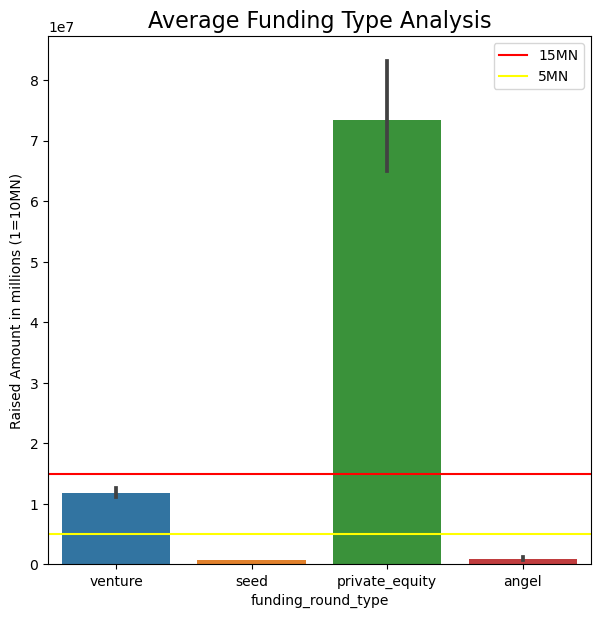

In [93]:
#plotting the average raised amount for funding type which suits the Spark Fund investment of(5-15) M USD
plt.figure(figsize=(7,7),dpi=100)
sns.barplot(data=master_frame, x='funding_round_type',y='raised_amount_usd')
plt.axhline(y=15000000,color='red',label='15MN')
plt.axhline(y=5000000,color='yellow',label='5MN')
plt.title('Average Funding Type Analysis',size=(16))
plt.ylabel('Raised Amount in millions (1=10MN)')
plt.legend(loc=1)
plt.show()

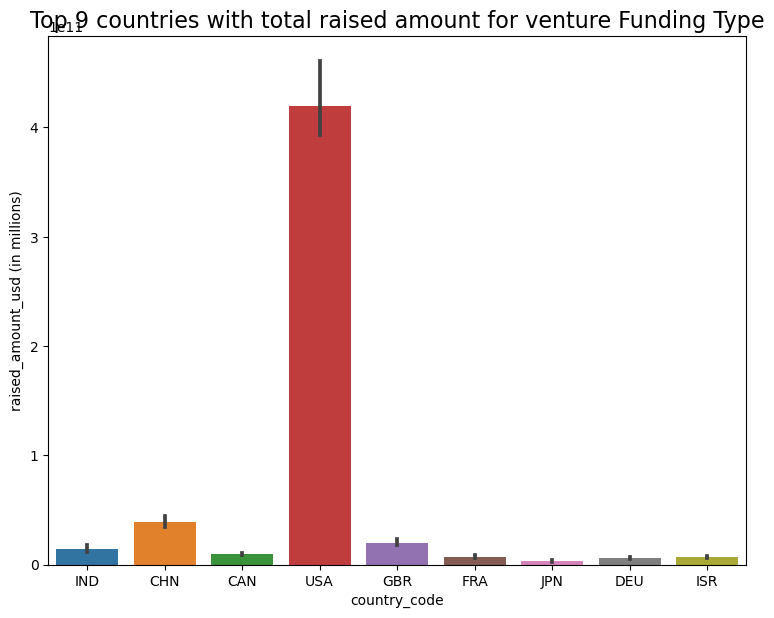

In [91]:
#plotting the top 9 countries against the total raised amount for FT
plt.figure(figsize=(9,7),dpi=100)
sns.barplot(y='raised_amount_usd', x='country_code', data=top9, estimator=np.sum)
plt.ylabel("raised_amount_usd (in millions)")
plt.title('Top 9 countries with total raised amount for venture Funding Type',size=(16))
plt.show()

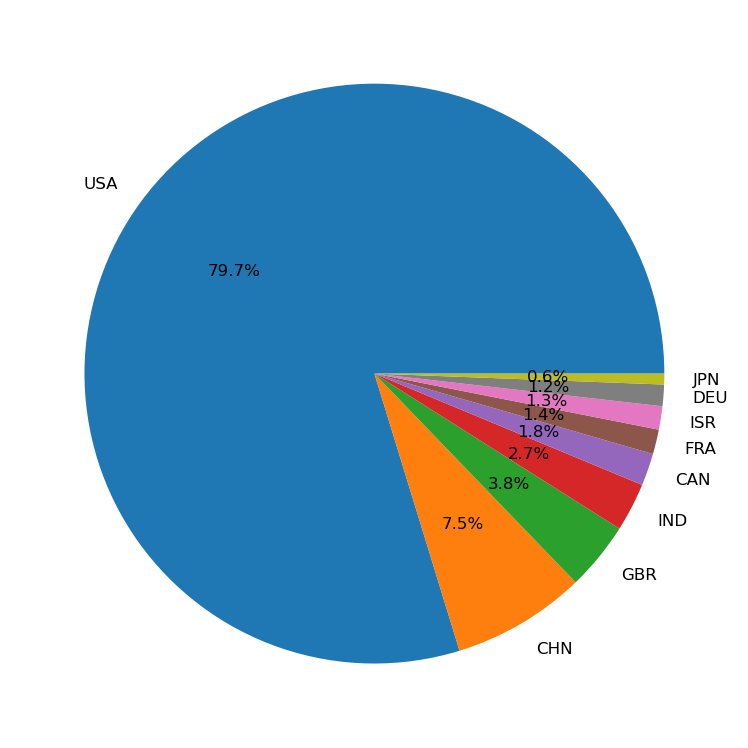

In [114]:
plt.figure(figsize=(8,8),dpi=120)
plt.pie(top9_plot,labels =top9_plot.index,autopct='%1.1f%%')
plt.show()

In [86]:
#creating a new dataframe which includes the top 3 english speaking countries and their man sectors
top3countries_sector=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])].append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]).append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])])

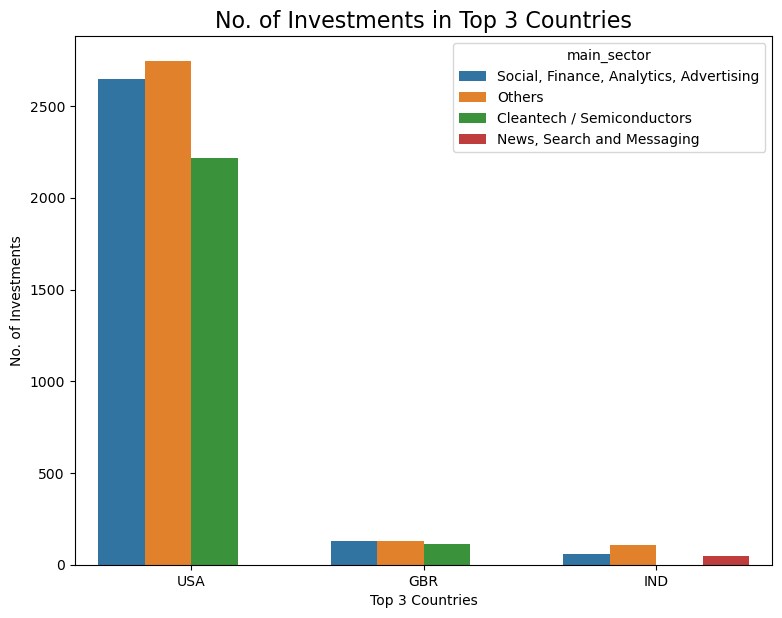

In [92]:
plt.figure(figsize=(9,7),dpi=100)
sns.barplot(y='raised_amount_usd', x='country_code',hue='main_sector', data=top3countries_sector,estimator=lambda x:len(x))
plt.ylabel("No. of Investments")
plt.xlabel('Top 3 Countries')
plt.title('No. of Investments in Top 3 Countries',size=16)
plt.show()